<h1>Projeto Ciência de Dados - Previsão de Vendas</h1>

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões de reais

- Base de Dados: está no github

<h2>Passo a Passo de um Projeto de Ciência de Dados</h2>

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

In [1]:
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

In [2]:
# Passo 3: Importando o banco de dados

import pandas as pd

tabela = pd.read_csv(r"C:\Users\Khawan\Downloads\advertising.csv")

display(tabela)

# Passo 4: Tratamento o banco de dados

display(tabela.info())

#Informações já estão tratadas

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

<h4> Análise Exploratória</h4>

- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

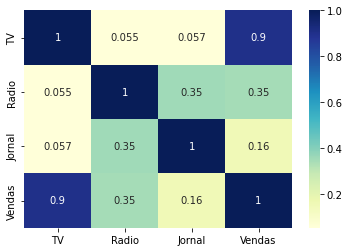

In [3]:
# Passo 5: Análise Explóratoria

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tabela.corr() , annot = True , cmap = "YlGnBu")

plt.show()

In [4]:
# Passo 6: Modelagem

from sklearn.model_selection import train_test_split

x = tabela[["TV" , "Radio" , "Jornal"]]

y = tabela["Vendas"]

x_treino , x_teste , y_treino , y_teste = train_test_split(x , y , test_size=0.2) # Dividindo o banco de dados em treino e teste

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criar as IA

modelo_linear = LinearRegression()

modelo_arvore = RandomForestRegressor()

# Treinar as IA

modelo_linear.fit(x_treino , y_treino)

modelo_arvore.fit(x_treino , y_treino)

RandomForestRegressor()

<h4>Teste da AI e Avaliação do Melhor Modelo</h4>

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [6]:
from sklearn import metrics

# Criar as previsões 

previsao_linear = modelo_linear.predict(x_teste)
previsao_arvore = modelo_arvore.predict(x_teste)

# Comparando qual modelo é melhor

print(metrics.r2_score(y_teste , previsao_linear))
print(metrics.r2_score(y_teste, previsao_arvore)) # Nesse caso, o modelo RandomForest é melhor

0.9139309605819683
0.9398802317919754


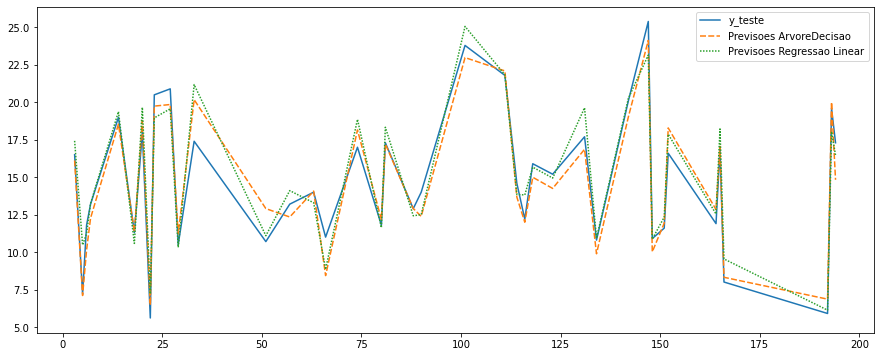

In [7]:
# Visualizando as graficamente as previsões

tabela_auxiliar = pd.DataFrame()

tabela_auxiliar["y_teste"] = y_teste

tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvore

tabela_auxiliar["Previsoes Regressao Linear"] = previsao_linear


plt.figure(figsize=(15,6))

sns.lineplot(data=tabela_auxiliar)

plt.show()

In [8]:
# Fazendo uma Nova previsão

dados = {'TV': [10.4 , 10.2] , 'Radio': [50.5 , 20.9] , 'Jornal': [10.2 , 50.8]} # Coloque os valores que queira prever

tabela_previsao = pd.DataFrame(data = dados)
display(tabela_previsao)

previsao = modelo_arvore.predict(tabela_previsao)
print(previsao)

,TV,Radio,Jornal
0,10.4,50.5,10.2
1,10.2,20.9,50.8


[6.924 6.418]


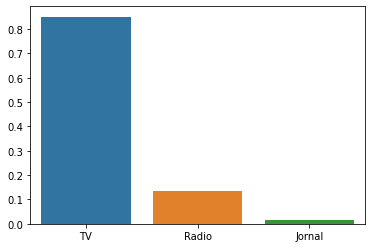

In [9]:
# Qual a importancia das variaveis para as vendas?

sns.barplot(x=x_treino.columns, y=modelo_arvore.feature_importances_)
plt.show()